In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('../data/nytimes_covid19_data/20200423_us-counties.csv')
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [12]:
# drop NA in fips
data = data.dropna()

# drop logs where county is Unknown
data= data[data.county != 'Unknown']

# chanve date to datetime object
data['date'] = pd.to_datetime(data['date'])

# concate county and state since some counties have the same name
data['county_state'] = data.county + ', ' + data.state

data.head()

,date,county,state,fips,cases,deaths,county_state
0,2020-01-21,Snohomish,Washington,53061.0,1,0,"Snohomish, Washington"
1,2020-01-22,Snohomish,Washington,53061.0,1,0,"Snohomish, Washington"
2,2020-01-23,Snohomish,Washington,53061.0,1,0,"Snohomish, Washington"
3,2020-01-24,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
4,2020-01-24,Snohomish,Washington,53061.0,1,0,"Snohomish, Washington"


In [27]:
#get data from recent date
max_date = data.date.max()
data_max_date = data[data['date']==max_date]
data_max_date.head()

,date,county,state,fips,cases,deaths,county_state
78546,2020-04-22,Autauga,Alabama,1001.0,32,2,"Autauga, Alabama"
78547,2020-04-22,Baldwin,Alabama,1003.0,132,3,"Baldwin, Alabama"
78548,2020-04-22,Barbour,Alabama,1005.0,29,0,"Barbour, Alabama"
78549,2020-04-22,Bibb,Alabama,1007.0,34,0,"Bibb, Alabama"
78550,2020-04-22,Blount,Alabama,1009.0,29,0,"Blount, Alabama"


In [28]:
# find top n counties with largest cumulative cases
top_n = 5

counties = data_max_date.groupby('county_state').sum().cases.nlargest(top_n).index.tolist()
counties

['Nassau, New York',
 'Suffolk, New York',
 'Westchester, New York',
 'Cook, Illinois',
 'Los Angeles, California']

In [36]:
df = data[data['county_state'] == 'Cook, Illinois']
df

,date,county,state,fips,cases,deaths,county_state
3,2020-01-24,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
6,2020-01-25,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
11,2020-01-26,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
16,2020-01-27,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
21,2020-01-28,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
...,...,...,...,...,...,...,...
68021,2020-04-18,Cook,Illinois,17031.0,20395,860,"Cook, Illinois"
70783,2020-04-19,Cook,Illinois,17031.0,21272,877,"Cook, Illinois"
73554,2020-04-20,Cook,Illinois,17031.0,22101,915,"Cook, Illinois"
76331,2020-04-21,Cook,Illinois,17031.0,23181,1002,"Cook, Illinois"


In [41]:
df[0:10]

,date,county,state,fips,cases,deaths,county_state
3,2020-01-24,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
6,2020-01-25,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
11,2020-01-26,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
16,2020-01-27,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
21,2020-01-28,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
26,2020-01-29,Cook,Illinois,17031.0,1,0,"Cook, Illinois"
31,2020-01-30,Cook,Illinois,17031.0,2,0,"Cook, Illinois"
37,2020-01-31,Cook,Illinois,17031.0,2,0,"Cook, Illinois"
43,2020-02-01,Cook,Illinois,17031.0,2,0,"Cook, Illinois"
51,2020-02-02,Cook,Illinois,17031.0,2,0,"Cook, Illinois"


In [46]:
n_train = int(df.shape[0] * 0.9)
train = df[0:n_train]
test = df[n_train:]

In [ ]:
# check stationary

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(cook['cases'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


ValueError: x must have 2 complete cycles requires 730 observations. x only has 90 observation(s)

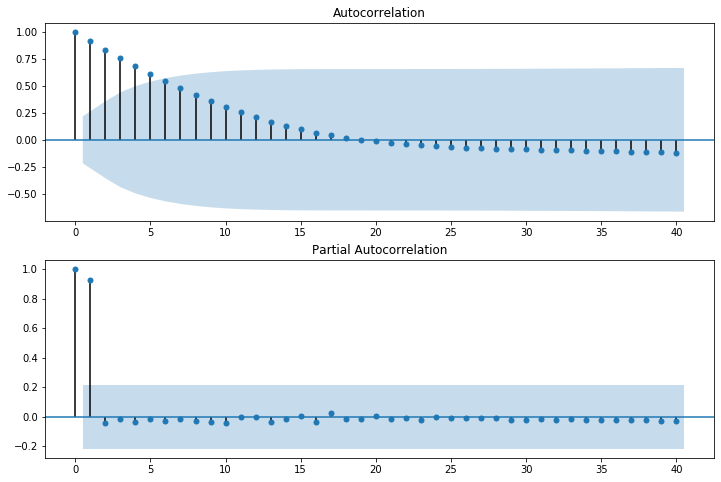

In [50]:
# plot ACF and PACF
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train.cases, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train.cases, lags=40, ax=ax2)# , lags=40

In [55]:
arima = sm.tsa.ARIMA(train.cases, (1,1,0)).fit(disp=False)
print(arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.cases   No. Observations:                   80
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -509.363
Method:                       css-mle   S.D. of innovations            139.244
Date:                Fri, 24 Apr 2020   AIC                           1024.726
Time:                        00:27:23   BIC                           1031.872
Sample:                             1   HQIC                          1027.591
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           250.9097    177.665      1.412      0.158     -97.306     599.126
ar.L1.D.cases     0.9221      0.044     20.975      0.000       0.836       1.008
                                    Root

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [56]:
start_index = 81
end_index = 89
train['forecast'] = arima.predict(start = start_index, end= end_index, dynamic= True)  
train[start_index:end_index][['cases', 'forecast']].plot(figsize=(12, 8))

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: no numeric data to plot

In [57]:
start_index = 81
end_index = 89
train['forecast'] = arima.predict(start = start_index, end= end_index, dynamic= True)  

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
train

,date,county,state,fips,cases,deaths,county_state,forecast
3,2020-01-24,Cook,Illinois,17031.0,1,0,"Cook, Illinois",NaN
6,2020-01-25,Cook,Illinois,17031.0,1,0,"Cook, Illinois",NaN
11,2020-01-26,Cook,Illinois,17031.0,1,0,"Cook, Illinois",NaN
16,2020-01-27,Cook,Illinois,17031.0,1,0,"Cook, Illinois",NaN
21,2020-01-28,Cook,Illinois,17031.0,1,0,"Cook, Illinois",NaN
...,...,...,...,...,...,...,...,...
43841,2020-04-09,Cook,Illinois,17031.0,11415,351,"Cook, Illinois",NaN
46440,2020-04-10,Cook,Illinois,17031.0,12472,398,"Cook, Illinois",NaN
49069,2020-04-11,Cook,Illinois,17031.0,13417,453,"Cook, Illinois",NaN
51731,2020-04-12,Cook,Illinois,17031.0,14585,485,"Cook, Illinois",NaN
